데이터 미리보기:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


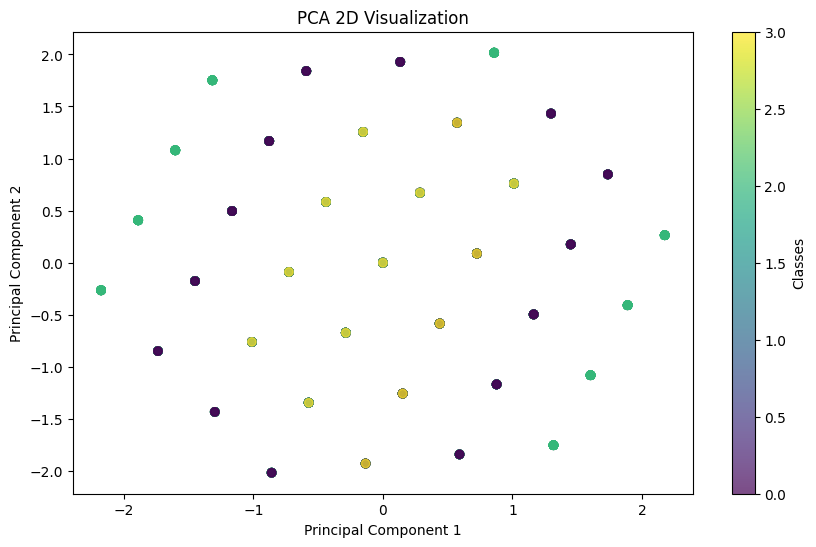

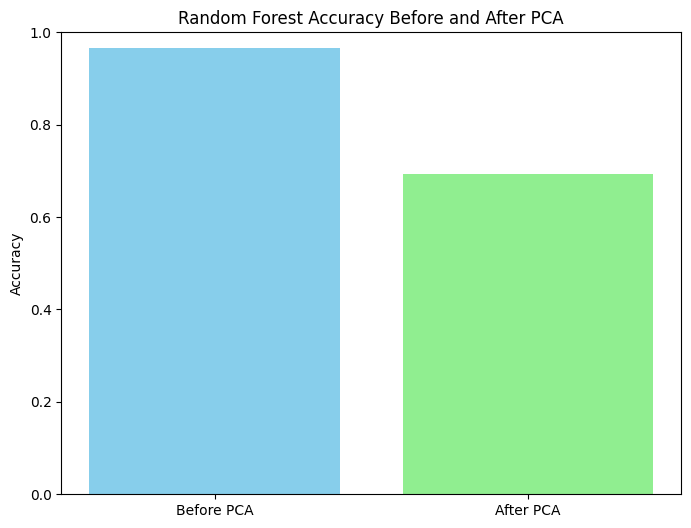

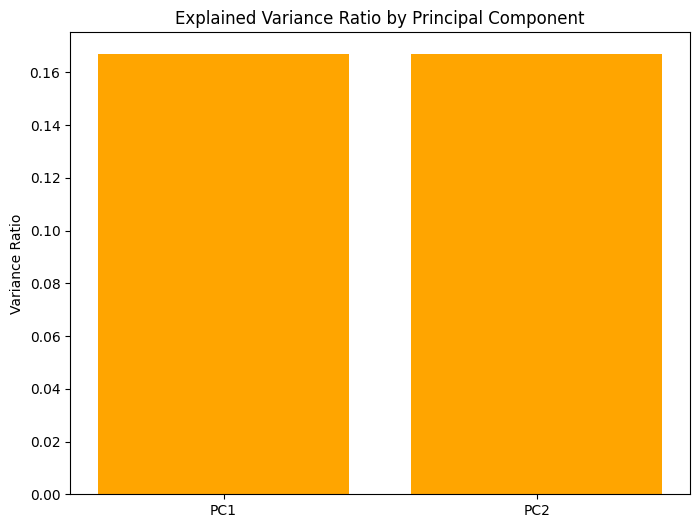

Random Forest Accuracy (Before PCA): 0.9653179190751445
Random Forest Accuracy (After PCA): 0.6936416184971098

Explained Variance Ratio (PCA):
PC1: 0.17
PC2: 0.17


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

data = pd.read_csv('car_evaluation.csv')

# 범주형 데이터를 숫자로 변환
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 독립변수(X)와 종속변수(y) 분리
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA(n_components=2)  # 2차원으로 축소
X_pca = pca.fit_transform(X_scaled)

# PCA 축소 결과 산점도 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Classes')
plt.title('PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# PCA 전후 랜덤포레스트 성능 비교
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 랜덤포레스트 학습 (PCA 전)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# 랜덤포레스트 학습 (PCA 후)
rf_model_pca = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_pca.fit(X_pca_train, y_train)
rf_pca_pred = rf_model_pca.predict(X_pca_test)
rf_pca_accuracy = accuracy_score(y_test, rf_pca_pred)

# 성능 비교 시각화
models = ['Before PCA', 'After PCA']
accuracies = [rf_accuracy, rf_pca_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy Before and After PCA')
plt.ylim(0, 1)
plt.show()

# 주성분 기여도 분석
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(['PC1', 'PC2'], explained_variance_ratio, color='orange')
plt.title('Explained Variance Ratio by Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

# 결과 출력
print("Random Forest Accuracy (Before PCA):", rf_accuracy)
print("Random Forest Accuracy (After PCA):", rf_pca_accuracy)
print("\nExplained Variance Ratio (PCA):")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {ratio:.2f}")
